# Plot power curve for DSRR

a quick script to plot the power vs ODMR contrast curve for the DSRRs. 

In [41]:
import pandas as pd 
import matplotlib.pyplot as plot
import numpy as np
import scipy.optimize as opt

In [42]:
def import_data(file):
    '''Import data into pandas array'''
    
    data = pd.read_table(file, delimiter = ',')
    return(data)

In [43]:
def convert_dBm_to_mW(power_dBm):
    '''Convert power in dBm to mW'''
    
    power_mW = np.power(10, (power_dBm/10))
    
    return(power_mW)

In [44]:
def linear(x, m, c): 
    
    y = m*x + c
    return(y)

In [45]:
def set_plot_params():
    # formats the plot parameters 
    plot.rcParams.update({'font.size' : 16})
    plot.rcParams.update({'figure.figsize' :[12, 8]})

In [46]:
folder = 'I:\\Science\\Physics-Nanobiophotonics\\Group\\User Data Analysis\\Ryans Data (2018-2021)\\ODMR\\2019\\20190401\\'
file = '20190401_NVScan_analysis'

data = import_data(folder + file + '.dat')
contrast = data[' Contrast (%)']

power_dBm = np.array([35, 34.5, 34, 33.5, 33, 32.5, 32, 31.5, 31, 31.5, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20])
power_mW = convert_dBm_to_mW(power_dBm)

p0 = [0, 0]
fit_params, fit_confidence = opt.curve_fit(linear, power_mW, contrast[1:], p0)

y  = linear(power_mW, fit_params[0], fit_params[1])
set_plot_params()


(21,)
(22,)
1.3560993042115492


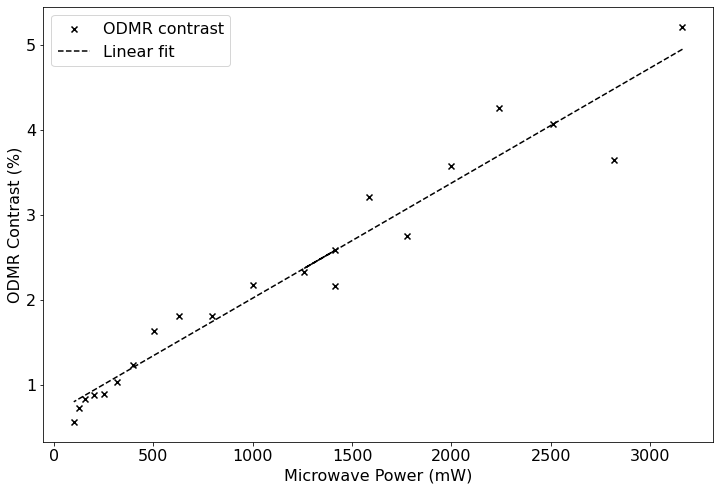

In [38]:
print(power_mW.shape)
print(contrast.shape)

fig, ax = plot.subplots()
ax.scatter(power_mW, contrast[1:], marker = 'x', color = 'k',
          label='ODMR contrast')
ax.plot(power_mW, y, color = 'k', linestyle = '--',
       label = 'Linear fit')

plot.xlabel('Microwave Power (mW)')
plot.ylabel('ODMR Contrast (%)')
plot.legend()

print(fit_params[0]*1000)

fig.savefig('H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\First ODMR curve plots\\' + 'mwave_power_plot.pdf')

In [48]:
print(power_mW)

[3162.27766017 2818.38293126 2511.88643151 2238.72113857 1995.26231497
 1778.27941004 1584.89319246 1412.53754462 1258.92541179 1412.53754462
 1000.          794.32823472  630.95734448  501.18723363  398.10717055
  316.22776602  251.18864315  199.5262315   158.48931925  125.89254118
  100.        ]
